## Data Preprocessing:
### Objective
Handle missing values, outliers, and any inconsistencies in the data.

Save the cleaned data to the data/processed directory.

Tasks
1. Load the data.

2. Handle missing values.

3. Handle outliers.

4. Save the cleaned data.

In [3]:
import pandas as pd
import numpy as np

# 1. Load the data
df = pd.read_csv('data/raw/marketing_data.csv')

# Display the first few rows of the dataset
print(df.head())

# 2. Handle missing values (if any)
# For simplicity, we'll fill missing values with the mean for numerical columns and the mode for categorical columns
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].fillna(df[column].mode()[0])
    else:
        df[column] = df[column].fillna(df[column].mean())

# 3. Handle outliers
# For simplicity, we'll use the IQR method to detect and remove outliers for numerical columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

# 4. Save the cleaned data
df.to_csv('data/processed/cleaned_marketing_data.csv', index=False)

print("Data preprocessing and cleaning completed. Cleaned data saved to 'data/processed/cleaned_marketing_data.csv'")


   CustomerID  Age  Gender  Income    Education Marital_Status  \
0           1   56    Male   38794     Bachelor         Single   
1           2   69  Female   50653          PhD       Divorced   
2           3   46  Female   48977       Master        Married   
3           4   32    Male   53451  High School        Widowed   
4           5   60    Male   17133  High School        Married   

   Total_Spending  Campaign_Acceptance Last_Purchase_Date Region Occupation  \
0            2101                    1         2024-12-22   East     Lawyer   
1            2388                    0         2023-07-27  South    Teacher   
2            2386                    0         2024-01-07   East     Doctor   
3            2428                    0         2023-11-10   East  Scientist   
4            2502                    1         2024-10-21  South   Engineer   

   Number_of_Children  Household_Size  Customer_Lifetime_Value  \
0                   2               4                    16625

## Exploratory Data Analysis (EDA)
### Objective
Understand the data and identify patterns.

Use visualizations and summary statistics to gain insights.

Tasks
1. Load the cleaned data.

2. Perform summary statistics.

3. Create visualizations to explore the data.

   CustomerID  Age  Gender  Income    Education Marital_Status  \
0           1   56    Male   38794     Bachelor         Single   
1           2   69  Female   50653          PhD       Divorced   
2           3   46  Female   48977       Master        Married   
3           4   32    Male   53451  High School        Widowed   
4           5   60    Male   17133  High School        Married   

   Total_Spending  Campaign_Acceptance Last_Purchase_Date Region Occupation  \
0            2101                    1         2024-12-22   East     Lawyer   
1            2388                    0         2023-07-27  South    Teacher   
2            2386                    0         2024-01-07   East     Doctor   
3            2428                    0         2023-11-10   East  Scientist   
4            2502                    1         2024-10-21  South   Engineer   

   Number_of_Children  Household_Size  Customer_Lifetime_Value  \
0                   2               4                    16625

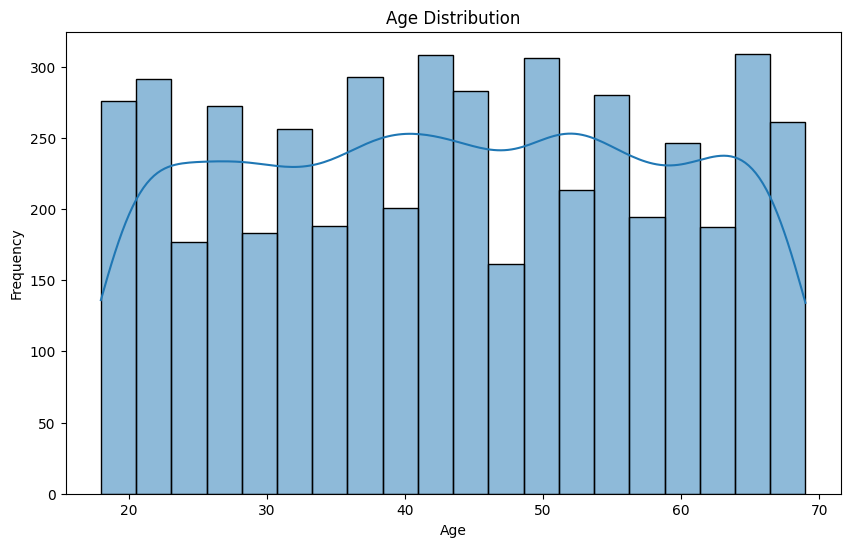

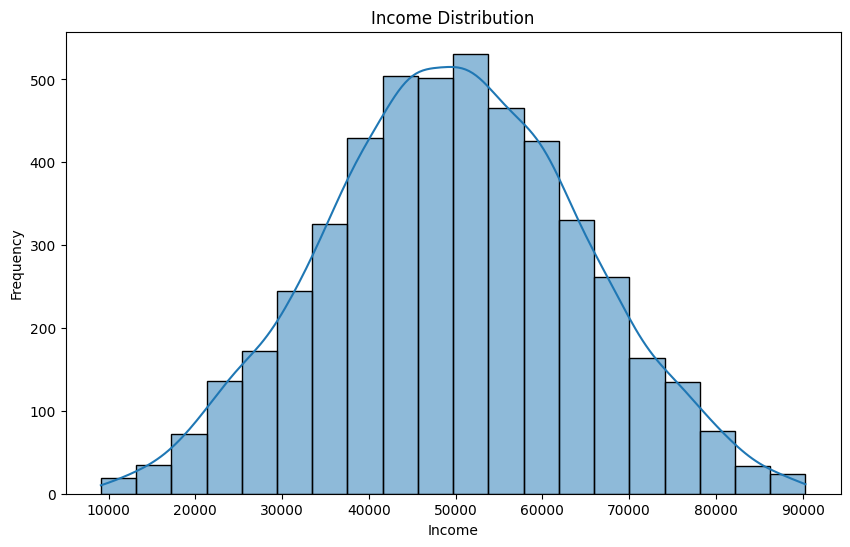

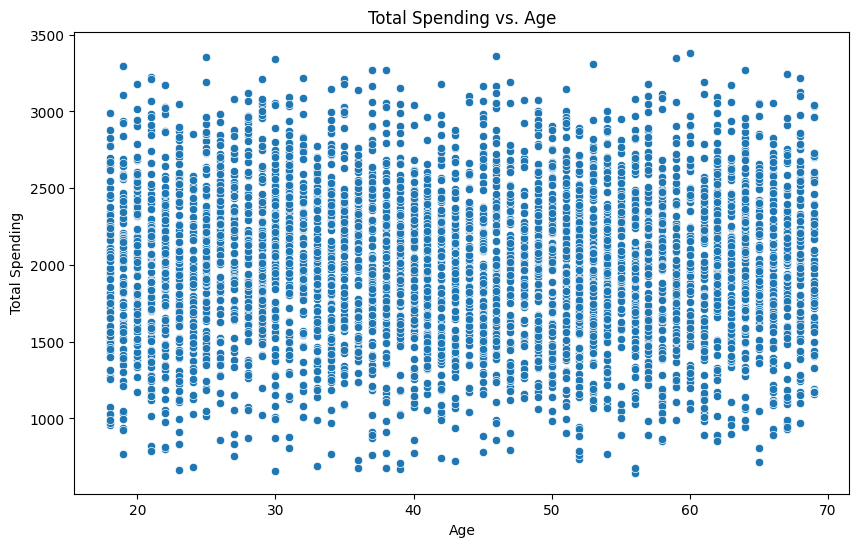

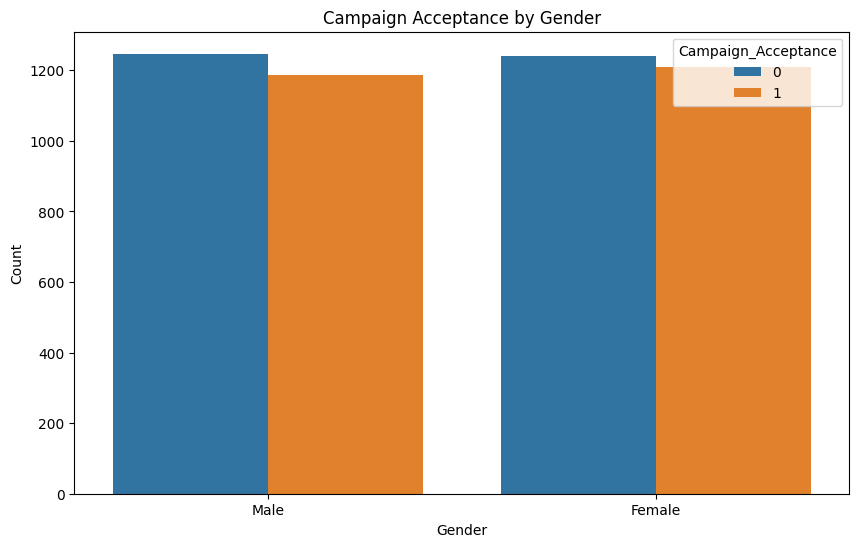

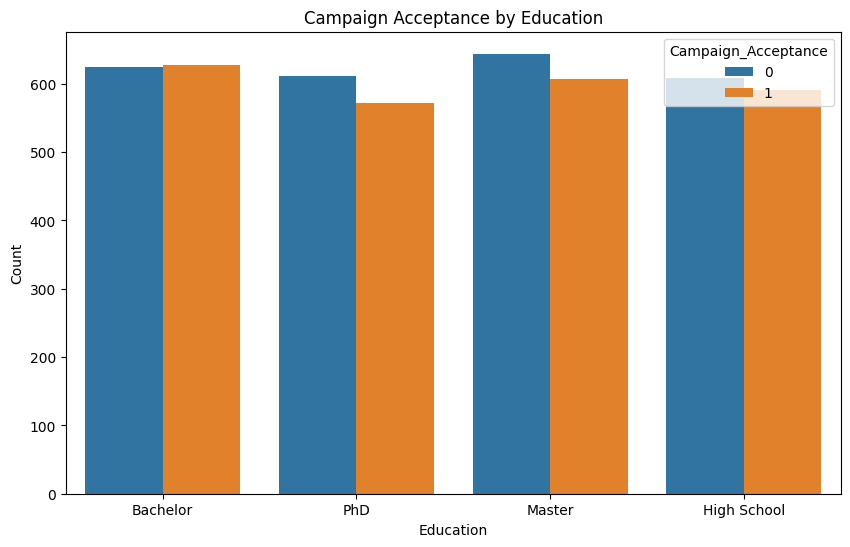

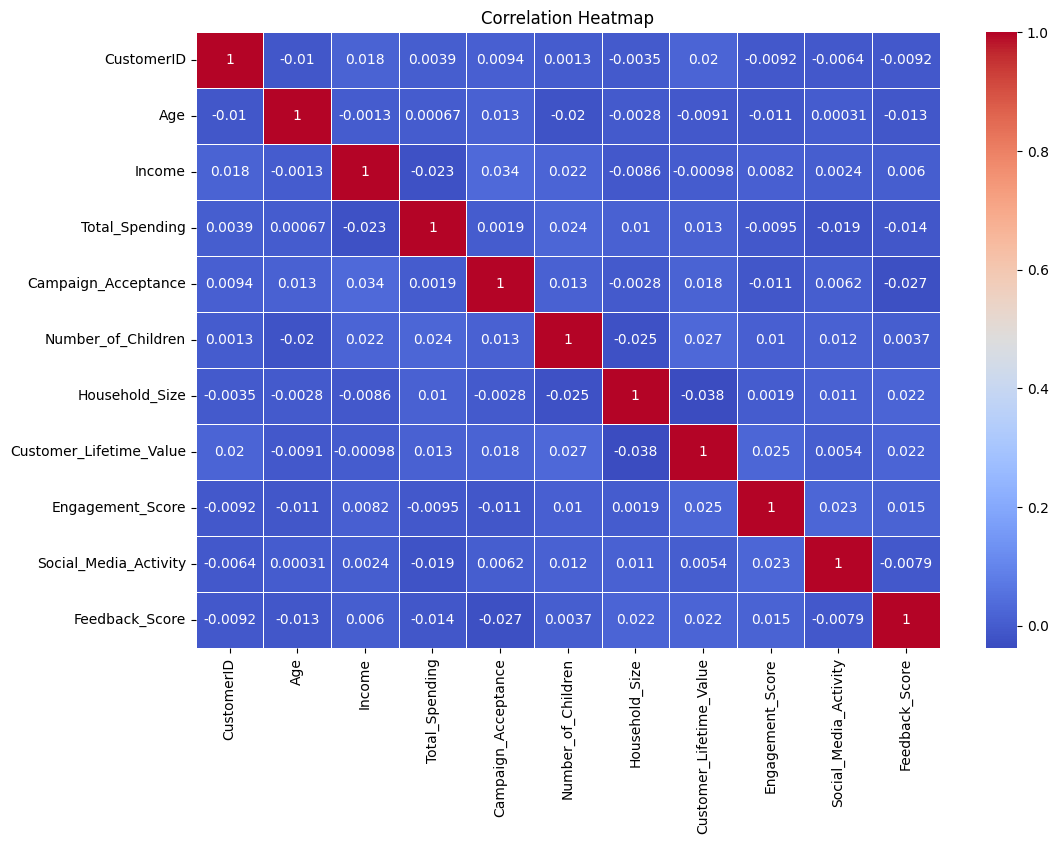

In [5]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned data
df = pd.read_csv('data/processed/cleaned_marketing_data.csv')

# Display the first few rows of the dataset
print(df.head())

# Summary statistics
summary_stats = df.describe()
print(summary_stats)

# Visualizations

# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Income distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Income'], bins=20, kde=True)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

# Total Spending vs. Age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Total_Spending', data=df)
plt.title('Total Spending vs. Age')
plt.xlabel('Age')
plt.ylabel('Total Spending')
plt.show()

# Campaign Acceptance by Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Campaign_Acceptance', data=df)
plt.title('Campaign Acceptance by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Campaign Acceptance by Education
plt.figure(figsize=(10, 6))
sns.countplot(x='Education', hue='Campaign_Acceptance', data=df)
plt.title('Campaign Acceptance by Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

# Correlation heatmap (excluding non-numeric columns)
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


## Feature Engineering
### Objective
Extract and engineer features for model development.

Create new features that may improve model performance.

Tasks
1. Load the cleaned data.

2. Create new features.

3. Save the engineered features.

In [6]:
import pandas as pd

# Load the cleaned data
df = pd.read_csv('data/processed/cleaned_marketing_data.csv')

# Create new features

# Age Group
df['Age_Group'] = pd.cut(df['Age'], bins=[18, 30, 40, 50, 60, 70], labels=['18-30', '31-40', '41-50', '51-60', '61-70'])

# Income Level
df['Income_Level'] = pd.cut(df['Income'], bins=[0, 30000, 60000, 90000, 120000], labels=['Low', 'Medium', 'High', 'Very High'])

# Total Spending per Age
df['Spending_per_Age'] = df['Total_Spending'] / df['Age']

# Days Since Last Purchase
df['Last_Purchase_Date'] = pd.to_datetime(df['Last_Purchase_Date'])
df['Days_Since_Last_Purchase'] = (pd.Timestamp('now') - df['Last_Purchase_Date']).dt.days

# Save the engineered features
df.to_csv('data/processed/engineered_features.csv', index=False)

print("Feature engineering completed. Engineered features saved to 'data/processed/engineered_features.csv'")


Feature engineering completed. Engineered features saved to 'data/processed/engineered_features.csv'


## Model Development and Evaluation
### Objective
Develop and train machine learning models using the processed data.

Experiment with different algorithms and hyperparameters.

Evaluate the models using appropriate metrics.

Tasks
1. Load the engineered features.

2. Split the data into training and testing sets.

3. Develop and train machine learning models.

4. Evaluate the models.

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import joblib

# Load the engineered features
file_path = 'data/processed/engineered_features.csv'
df = pd.read_csv(file_path)

# Prepare the data for modeling
X = df.drop(['Campaign_Acceptance', 'CustomerID', 'Last_Purchase_Date'], axis=1)
y = df['Campaign_Acceptance']

# Encode categorical variables using LabelEncoder
categorical_columns = X.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create XGBoost DMatrix
train_data = xgb.DMatrix(X_train, label=y_train)
test_data = xgb.DMatrix(X_test, label=y_test)

# Set parameters for XGBoost
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'learning_rate': 0.05,
    'max_depth': 6
}

# Train the model
model = xgb.train(params, train_data, num_boost_round=100, evals=[(train_data, 'train'), (test_data, 'eval')], early_stopping_rounds=10)

# Save the model
model_filename = 'best_model.pkl'
joblib.dump(model, model_filename)

# Predict and evaluate the model
y_pred = model.predict(test_data)
y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]
accuracy = accuracy_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
class_report = classification_report(y_test, y_pred_binary)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


[0]	train-logloss:0.68932	eval-logloss:0.69234
[1]	train-logloss:0.68566	eval-logloss:0.69233
[2]	train-logloss:0.68207	eval-logloss:0.69237
[3]	train-logloss:0.67901	eval-logloss:0.69248
[4]	train-logloss:0.67601	eval-logloss:0.69278
[5]	train-logloss:0.67261	eval-logloss:0.69329
[6]	train-logloss:0.66972	eval-logloss:0.69384
[7]	train-logloss:0.66715	eval-logloss:0.69378
[8]	train-logloss:0.66456	eval-logloss:0.69398
[9]	train-logloss:0.66134	eval-logloss:0.69457
[10]	train-logloss:0.65852	eval-logloss:0.69521
Accuracy: 0.5097236438075742
Confusion Matrix:
[[292 211]
 [268 206]]
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.58      0.55       503
           1       0.49      0.43      0.46       474

    accuracy                           0.51       977
   macro avg       0.51      0.51      0.51       977
weighted avg       0.51      0.51      0.51       977



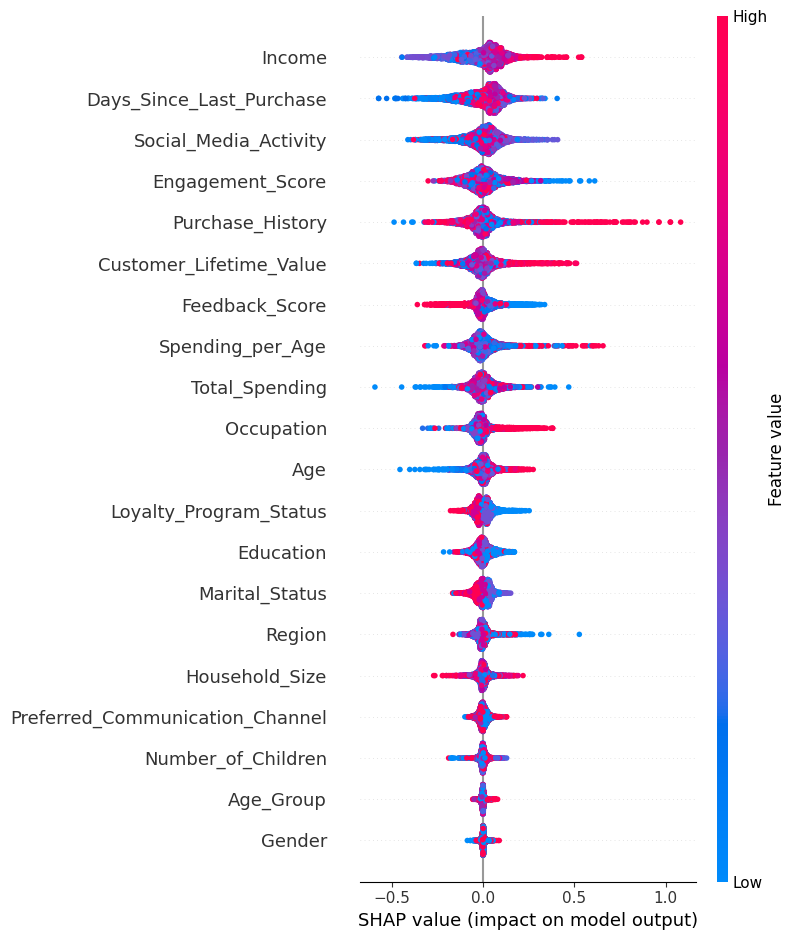

In [15]:
import shap
import xgboost as xgb
import pandas as pd

# Load the engineered features
file_path = 'data/processed/engineered_features.csv'
df = pd.read_csv(file_path)

# Prepare the data for modeling
X = df.drop(['Campaign_Acceptance', 'CustomerID', 'Last_Purchase_Date'], axis=1)
y = df['Campaign_Acceptance']

# Encode categorical variables using LabelEncoder
categorical_columns = X.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Train the XGBoost model
train_data = xgb.DMatrix(X, label=y)
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'learning_rate': 0.05,
    'max_depth': 6
}
model = xgb.train(params, train_data, num_boost_round=100)

# Use SHAP to explain the model's predictions
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# Plot SHAP summary
shap.summary_plot(shap_values, X)


In [17]:
# Example code to gather feedback (this will depend on your specific application and setup)
def gather_feedback():
    # Collect feedback from users
    feedback = input("Please provide your feedback: ")
    return feedback

# Example code to iterate on the model (this will depend on the feedback received)
def iterate_model(feedback):
    # Use the feedback to improve the model
    print(f"Received feedback: {feedback}")
    # Implement improvements based on feedback

# Gather feedback and iterate
feedback = gather_feedback()
iterate_model(feedback)


Please provide your feedback:  Well done!


Received feedback: Well done!
